In [ ]:
!pip install dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.37
    Uninstalling SQLAlchemy-2.0.37:
      Successfully uninstalled SQLAlchemy-2.0.37
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [ ]:
!pip install transformers datasets rouge-score bert-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.9 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=6f775bf00529c2f8ebc368c960287a50223ba62dc7f0a3478692b72b7383013c
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's de

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments, BertTokenizer, AutoTokenizer
from datasets import load_dataset
import torch

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jan 20 09:44:59 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datasets import load_dataset

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_json('/content/drive/MyDrive/Colab Notebooks/indosum/train.01.jsonl',lines=True)
val = pd.read_json('/content/drive/MyDrive/Colab Notebooks/indosum/test.01.jsonl',lines=True)
test = pd.read_json('/content/drive/MyDrive/Colab Notebooks/indosum/dev.01.jsonl',lines=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14262 entries, 0 to 14261
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     14262 non-null  object
 1   gold_labels  14262 non-null  object
 2   id           14262 non-null  object
 3   paragraphs   14262 non-null  object
 4   source       14262 non-null  object
 5   source_url   14262 non-null  object
 6   summary      14262 non-null  object
dtypes: object(7)
memory usage: 780.1+ KB


In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     3762 non-null   object
 1   gold_labels  3762 non-null   object
 2   id           3762 non-null   object
 3   paragraphs   3762 non-null   object
 4   source       3762 non-null   object
 5   source_url   3762 non-null   object
 6   summary      3762 non-null   object
dtypes: object(7)
memory usage: 205.9+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     750 non-null    object
 1   gold_labels  750 non-null    object
 2   id           750 non-null    object
 3   paragraphs   750 non-null    object
 4   source       750 non-null    object
 5   source_url   750 non-null    object
 6   summary      750 non-null    object
dtypes: object(7)
memory usage: 41.1+ KB


In [ ]:
indosum = pd.concat([train, val, test], ignore_index=True)

# **Preprocessing Dataset**

In [ ]:
indosum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18774 entries, 0 to 18773
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     18774 non-null  object
 1   gold_labels  18774 non-null  object
 2   id           18774 non-null  object
 3   paragraphs   18774 non-null  object
 4   source       18774 non-null  object
 5   source_url   18774 non-null  object
 6   summary      18774 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [ ]:
indosum.head()

,category,gold_labels,id,paragraphs,source,source_url,summary
0,tajuk utama,"[[False, True], [True, True], [False, False, F...",1501893029-lula-kamal-dokter-ryan-thamrin-saki...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dokter, R...",cnn indonesia,https://www.cnnindonesia.com/hiburan/201708041...,"[[Dokter, Lula, Kamal, yang, merupakan, selebr..."
1,teknologi,"[[False, False, False, False], [False, True, T...",1509072914-dua-smartphone-zenfone-baru-tawarka...,"[[[Selfie, ialah, salah, satu, tema, terpanas,...",dailysocial.id,https://dailysocial.id/post/dua-smartphone-zen...,"[[Asus, memperkenalkan, , ZenFone, generasi, ..."
2,hiburan,"[[True], [True], [False, False], [False], [Fal...",1510613677-songsong-visit-2020-bengkulu-perkua...,"[[[Jakarta, ,, CNN, Indonesia, -, -, Dinas, Pa...",cnn indonesia,https://www.cnnindonesia.com/gaya-hidup/201711...,"[[Dinas, Pariwisata, Provinsi, Bengkulu, kemba..."
3,tajuk utama,"[[True, True], [False, False, False], [True], ...",1502706803-icw-ada-kejanggalan-atas-tewasnya-s...,"[[[Merdeka.com, -, Indonesia, Corruption, Watc...",merdeka,https://www.merdeka.com/peristiwa/icw-merasa-a...,"[[Indonesia, Corruption, Watch, (, ICW, ), mem..."
4,tajuk utama,"[[False, True], [True, True, True], [False], [...",1503039338-pembagian-sepeda-usai-upacara-penur...,"[[[Merdeka.com, -, Presiden, Joko, Widodo, (, ...",merdeka,https://www.merdeka.com/peristiwa/usai-upacara...,"[[Jokowi, memimpin, upacara, penurunan, bender..."


In [ ]:
print(indosum['paragraphs'][0])

[[['Jakarta', ',', 'CNN', 'Indonesia', '-', '-', 'Dokter', 'Ryan', 'Thamrin', ',', 'yang', 'terkenal', 'lewat', 'acara', 'Dokter', 'Oz', 'Indonesia', ',', 'meninggal', 'dunia', 'pada', 'Jumat', '(', '4', '/', '8', ')', 'dini', 'hari', '.'], ['Dokter', 'Lula', 'Kamal', 'yang', 'merupakan', 'selebriti', 'sekaligus', 'rekan', 'kerja', 'Ryan', 'menyebut', 'kawannya', 'itu', 'sudah', 'sakit', 'sejak', 'setahun', 'yang', 'lalu', '.']], [['Lula', 'menuturkan', ',', 'sakit', 'itu', 'membuat', 'Ryan', 'mesti', 'vakum', 'dari', 'semua', 'kegiatannya', ',', 'termasuk', 'menjadi', 'pembawa', 'acara', 'Dokter', 'Oz', 'Indonesia', '.'], ['Kondisi', 'itu', 'membuat', 'Ryan', 'harus', 'kembali', 'ke', 'kampung', 'halamannya', 'di', 'Pekanbaru', ',', 'Riau', 'untuk', 'menjalani', 'istirahat', '.']], [['"', 'Setahu', 'saya', 'dia', 'orangnya', 'sehat', ',', 'tapi', 'tahun', 'lalu', 'saya', 'dengar', 'dia', 'sakit', '.'], ['(', 'Karena', ')', 'sakitnya', ',', 'ia', 'langsung', 'pulang', 'ke', 'Pekanbaru'

In [ ]:
print(indosum['summary'][0])

[['Dokter', 'Lula', 'Kamal', 'yang', 'merupakan', 'selebriti', 'sekaligus', 'rekan', 'kerja', 'Ryan', 'Thamrin', 'menyebut', 'kawannya', 'itu', 'sudah', 'sakit', 'sejak', 'setahun', 'yang', 'lalu', '.'], ['Lula', 'menuturkan', ',', 'sakit', 'itu', 'membuat', 'Ryan', 'mesti', 'vakum', 'dari', 'semua', 'kegiatannya', ',', 'termasuk', 'menjadi', 'pembawa', 'acara', 'Dokter', 'Oz', 'Indonesia', '.'], ['Kondisi', 'itu', 'membuat', 'Ryan', 'harus', 'kembali', 'ke', 'kampung', 'halamannya', 'di', 'Pekanbaru', ',', 'Riau', 'untuk', 'menjalani', 'istirahat', '.']]


## Function for Cleaning Space

In [ ]:
import re

### For paragraphs column

In [ ]:
def clean_text(text):
    # Menghilangkan spasi di sekitar tanda baca
    text = re.sub(r'\s([?.!,](?:\s|$))', r'\1', text)
    # Menghilangkan spasi di dalam kurung
    text = re.sub(r'\(\s+', '(', text)
    text = re.sub(r'\s+\)', ')', text)
    text = re.sub(r'\[\s+', '[', text)
    text = re.sub(r'\s+\]', ']', text)
    text = re.sub(r'\s+/', '/', text)
    text = re.sub(r'/\s+', '/', text)
    return text

### For summary column

In [ ]:
def clean_summary_text(text):
    # Bersihkan spasi yang tidak diperlukan sebelum tanda baca
    text = re.sub(r'\s([?.!,](?:\s|$))', r'\1', text)
    text = re.sub(r'\(\s+', '(', text)
    text = re.sub(r'\s+\)', ')', text)
    text = re.sub(r'\s+/', '/', text)
    text = re.sub(r'/\s+', '/', text)
    return text

## Implement Function

In [ ]:
indosum['text'] = indosum['paragraphs'].apply(
    lambda x: clean_text(' '.join([' '.join(sentence).strip() for paragraph in x for sentence in paragraph]))
)

In [ ]:
indosum['text'][0]

'Jakarta, CNN Indonesia - - Dokter Ryan Thamrin, yang terkenal lewat acara Dokter Oz Indonesia, meninggal dunia pada Jumat (4/8) dini hari. Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu. Lula menuturkan, sakit itu membuat Ryan mesti vakum dari semua kegiatannya, termasuk menjadi pembawa acara Dokter Oz Indonesia. Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru, Riau untuk menjalani istirahat. " Setahu saya dia orangnya sehat, tapi tahun lalu saya dengar dia sakit. (Karena) sakitnya, ia langsung pulang ke Pekanbaru, jadi kami yang mau jenguk juga susah. Barangkali mau istirahat, ya betul juga, kalau di Jakarta susah isirahatnya, " kata Lula kepada CNNIndonesia.com, Jumat (4/8). Lula yang mengenal Ryan sejak sebelum aktif berkarier di televisi mengaku belum sempat membesuk Ryan lantaran lokasi yang jauh. Dia juga tak tahu penyakit apa yang diderita Ryan. " Itu saya enggak tahu, bel

In [ ]:
indosum['sum'] = indosum['summary'].apply(
    lambda x: clean_summary_text(' '.join([' '.join(sentence) for sentence in x]))
)

In [ ]:
indosum['sum'][0]

'Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan Thamrin menyebut kawannya itu sudah sakit sejak setahun yang lalu. Lula menuturkan, sakit itu membuat Ryan mesti vakum dari semua kegiatannya, termasuk menjadi pembawa acara Dokter Oz Indonesia. Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru, Riau untuk menjalani istirahat.'

## Selecting Columns

In [ ]:
indosum_new = indosum[['text', 'sum']]

In [ ]:
indosum_new.head()

,text,sum
0,"Jakarta, CNN Indonesia - - Dokter Ryan Thamrin...",Dokter Lula Kamal yang merupakan selebriti sek...
1,Selfie ialah salah satu tema terpanas di kalan...,Asus memperkenalkan ZenFone generasi keempat...
2,"Jakarta, CNN Indonesia - - Dinas Pariwisata Pr...",Dinas Pariwisata Provinsi Bengkulu kembali men...
3,Merdeka.com - Indonesia Corruption Watch (ICW)...,Indonesia Corruption Watch (ICW) meminta Komis...
4,Merdeka.com - Presiden Joko Widodo (Jokowi) me...,Jokowi memimpin upacara penurunan bendera. Usa...


## Take 10% of Dataset

In [ ]:
indosum_new = indosum_new.sample(frac=0.1, random_state=42)

In [ ]:
print(indosum_new.shape)

(1877, 2)


In [ ]:
# Check for missing values
print(indosum_new.isnull().sum())

text    0
sum     0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = indosum_new[indosum_new.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
if not duplicate_rows.empty:
  print("Duplicate rows:")
  print(duplicate_rows)

Number of duplicate rows: 0


In [ ]:
indosum_new.dtypes

,0
text,object
sum,object


## Removing the New Portal Headline

In [ ]:
# patterns_to_remove = [
#     r'cnn indonesia', r'CNN Indonesia', r'CNNINDONESIA', r'CNNIndonesia', r'cnnIndonesia', r'CNNindonesia',
#     r'cnn\.Indonesia', r'cnn\.indonesia', r'cnn\.INDONESIA', r'antaranews', r'antara news', r'antara\.news',
#     r'ANTARA news', r'ANTARA NEWS', r'Antara\.news', r'ANTARA\.news', r'ANTARA\.NEWS', r'dailysocial',
#     r'daily social', r'daily\.social', r'DAILYSOCIAL', r'Dailysocial\.id', r'Dailysocial', r'DAILY\.SOCIAL',
#     r'Daily\.Social', r'DailySocial\.id', r'DAILY\.SOCIAL\.ID', r'goal indonesia', r'Goal Indonesia',
#     r'GOAL Indonesia', r'GOAL INDONESIA', r'Goal\.Indonesia', r'GOAL\.INDONESIA', r'goal\.Indonesia',
#     r'goal\.INDONESIA', r'kumparan', r'Kumparan', r'KUMPARAN', r'kumparan\.com', r'Kumparan\.com',
#     r'KUMPARAN\.COM', r'Kumparan\.Com', r'KUMPARAN\.com', r'juara', r'juara net', r'juara\.net', r'JUARA\.NET',
#     r'JUARA', r'Juara', r'JUARA net', r'Juara\.Net', r'JUARA\.NET', r'merdeka', r'Merdeka', r'MERDEKA',
#     r'merdeka\.com', r'Merdeka\.com', r'MERDEKA\.COM', r'Merdeka\.Com', r'MERDEKA\.com', r'poskotanews',
#     r'poskota news', r'poskota\.news', r'POSKOTANEWS', r'Poskota\.News', r'POSKOTANEWS', r'poskota\.news',
#     r'POSKOTA\.NEWS', r'rimanews', r'rima news', r'rima\.news', r'RIMANEWS', r'Rima\.News', r'RIMA\.NEWS',
#     r'rima\.news', r'Rima\.News', r'suara', r'Suara', r'SUARA', r'suara\.com', r'Suara\.com', r'SUARA\.COM',
#     r'Suara\.Com', r'SUARA\.com', r'.com', r'.net', r'(Pos Kota)', r'.NET'
# ]

In [ ]:
# def remove_patterns(text, patterns):
#     for pattern in patterns:
#         text = re.sub(pattern, '', text, flags=re.IGNORECASE)  # Remove each pattern, case-insensitive
#     return text.strip()

In [ ]:
# indosum_new['text'] = indosum_new['text'].apply(lambda x: remove_patterns(x, patterns_to_remove))
# indosum_new['sum'] = indosum_new['sum'].apply(lambda x: remove_patterns(x, patterns_to_remove))

In [ ]:
# indosum_new.reset_index(inplace=True, drop=True)

In [ ]:
# indosum_new['sum'][0]

In [ ]:
# indosum_new['text'][0]

In [ ]:
# def remove_spaces_around_hyphen(text):
#   return re.sub(r'\s*-\s*', '-', text)

In [ ]:
# indosum_new['text'] = indosum_new['text'].apply(remove_spaces_around_hyphen)
# indosum_new['sum'] = indosum_new['sum'].apply(remove_spaces_around_hyphen)

In [ ]:
# indosum_new['text'][0]

In [ ]:
# indosum_new['sum'][0]

## Fixing typos

In [ ]:
def fix_typo(text):
  return re.sub(r'\bsebelumn\b', 'sebelumnya', text)
  return re.sub(r'\bmasrakat\b', 'masyarakat', text)
  return re.sub(r'\bkatan\b', 'ikatan', text)

In [ ]:
indosum_new['text'] = indosum_new['text'].apply(fix_typo)
indosum_new['sum'] = indosum_new['sum'].apply(fix_typo)

In [ ]:
indosum_new = indosum_new.reset_index(drop=True)

In [ ]:
indosum_new.head()

,text,sum
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...
1,"Jakarta, CNN Indonesia - - Direktur Jenderal O...",Direktur Jenderal Otonomi Daerah Kementerian D...
2,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi...",Mantan Ketua Komisi Pemberantasan Korupsi (KPK...
3,"Jakarta, CNN Indonesia - - Pesawat jet tempur ...",Pesawat jet tempur milik TNI AU melakukan fl...
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...


#**Visualization**

In [ ]:
import matplotlib.pyplot as plt

##Distribusi Kategori per Artikel

In [ ]:
category_counts = indosum['category'].value_counts()

In [ ]:
print(category_counts)

category
tajuk utama    7192
olahraga       4768
showbiz        2578
teknologi      2303
hiburan        1803
inspirasi       130
Name: count, dtype: int64


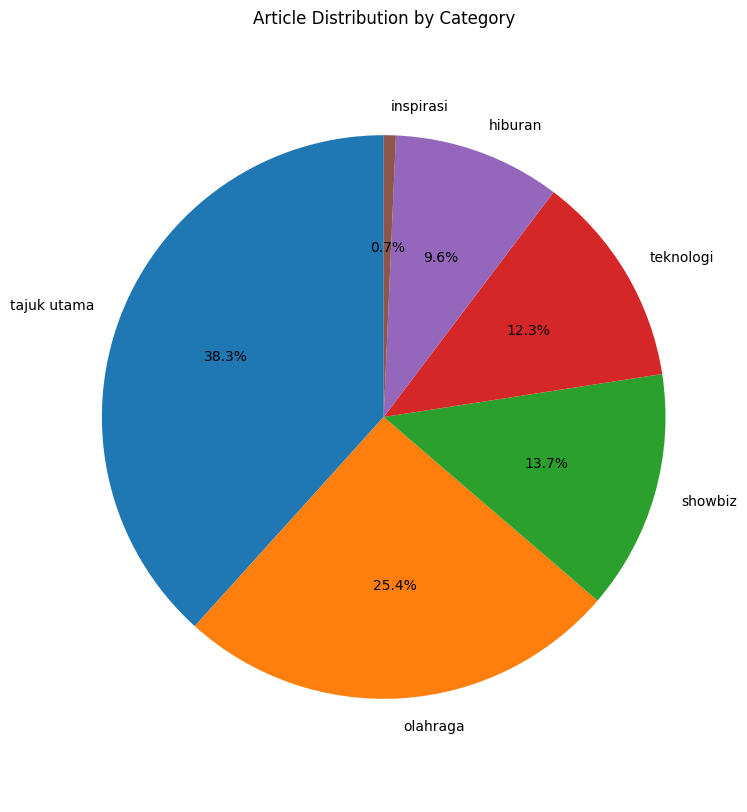

In [ ]:
#plotting per category
plt.figure(figsize=(8, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Article Distribution by Category')
plt.axis('equal')
plt.show()

##Distribusi Sumber Artikel

In [ ]:
source_category_counts = indosum.groupby(['source', 'category'])['id'].count().unstack()

<Figure size 2000x800 with 0 Axes>

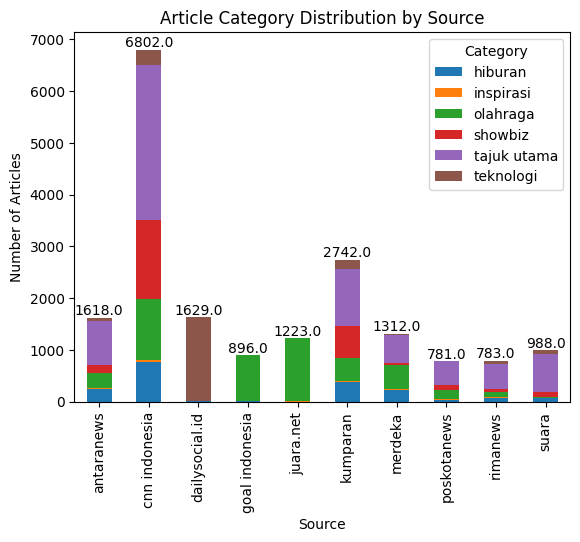

In [ ]:
plt.figure(figsize=(20, 8))
source_category_counts.plot(kind='bar', stacked=True)
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.title('Article Category Distribution by Source')
plt.legend(title='Category')

# total per portal berita
for i, p in enumerate(source_category_counts.index):
  total = source_category_counts.loc[p].sum()
  plt.text(i, total, str(total), ha='center', va='bottom')

plt.show()

##Word Cloud Frekuensi Kata kolom Paragraphs

https://github.com/masdevid/ID-Stopwords/blob/master/id.stopwords.02.01.2016.txt

In [ ]:
pip install nltk

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
indosumnew = indosum_new.copy()

In [ ]:
stop_words = set(stopwords.words('indonesian'))

In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [ ]:
indosumnew['cleaned_text'] = indosumnew['text'].apply(remove_stopwords)

In [ ]:
def remove_specific_words(text, words_to_remove):
  for word in words_to_remove:
    text = text.replace(word, '')
  return text

words_to_remove = ['itu','ini','memiliki','tersebut','Namun','salah','saja','orang','terkait','Sebelumnya','kali','lagi',
    'kami','mereka','cuma cuma','langsung','sangnama','cepat','Kami','pemain','lalu','dia'

]
indosumnew['cleaned_text'] = indosumnew['cleaned_text'].apply(lambda x: remove_specific_words(x, words_to_remove))

In [ ]:
indosumnew

,text,sum,cleaned_text
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...,Merdeka.com - Timnas Indonesia U - 16 dmbangka...
1,"Jakarta, CNN Indonesia - - Direktur Jenderal O...",Direktur Jenderal Otonomi Daerah Kementerian D...,"Jakarta, CNN Indonesia - - Direktur Jenderal O..."
2,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi...",Mantan Ketua Komisi Pemberantasan Korupsi (KPK...,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi..."
3,"Jakarta, CNN Indonesia - - Pesawat jet tempur ...",Pesawat jet tempur milik TNI AU melakukan fl...,"Jakarta, CNN Indonesia - - Pesawat jet tempur ..."
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...,"MALANG, JUARA.net - Persipura merangsek klasem..."
...,...,...,...
1872,"Jakarta, CNN Indonesia - - Kepolisian Negara R...",Kepolisian Negara Republik Indonesia mempredik...,"Jakarta, CNN Indonesia - - Kepolisian Negara R..."
1873,JAKARTA (Pos Kota) - Perempuan usia 10 tahun k...,Perempuan usia 10 tahun kini menjadi salah sat...,JAKARTA (Pos Kota) - Perempuan usia 10 fokus ...
1874,"Jakarta, CNN Indonesia - - Terbang di kelas ut...",Pemilik blog God Save the Points bernama Glibe...,"Jakarta, CNN Indonesia - - Terbang kelas utama..."
1875,"Jakarta, CNN Indonesia - - British Academy of ...",British Academy of Film and Television Arts (B...,"Jakarta, CNN Indonesia - - British Academy of ..."


In [ ]:
cleaned_text = ' '.join(indosumnew['cleaned_text'].tolist())

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white",colormap="tab10").generate(cleaned_text)

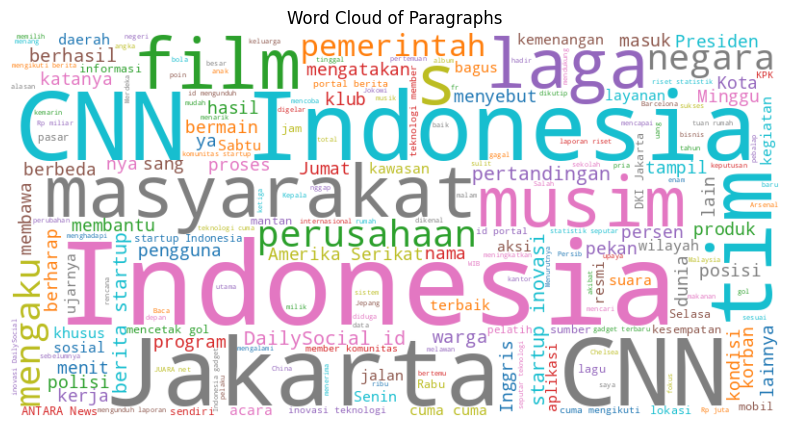

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paragraphs')
plt.show()

karena mostly "dan","dengan","atau","namun","serta" -> hilangin stopwords(?) but dari https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/ AVOID removal kaloo mau ke text summarization

##Distribusi Panjang Artikel dan Ringkasan

In [ ]:
indosumdist=indosum_new.copy()

In [ ]:
average_word_count = indosumdist['sum'].str.split().str.len().mean()

print(f"Average word count in the 'summary' column: {average_word_count}")

Average word count in the 'summary' column: 58.98454981353223


In [ ]:
average_word_count2 = indosumdist['text'].str.split().str.len().mean()

print(f"Average word count in the 'paragraphs' column: {average_word_count2}")

Average word count in the 'paragraphs' column: 297.9302077783697


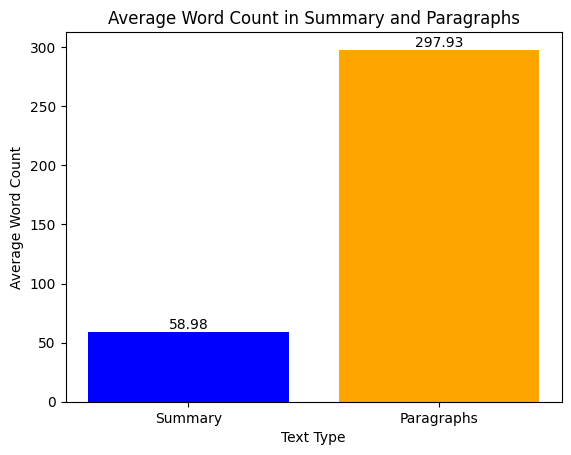

In [ ]:
categories = ['Summary', 'Paragraphs']
average_counts = [average_word_count, average_word_count2]
colors = ['blue', 'orange']  # Specify colors for each bar
bars = plt.bar(categories, average_counts, color=colors)
plt.xlabel('Text Type')
plt.ylabel('Average Word Count')
plt.title('Average Word Count in Summary and Paragraphs')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [ ]:
import seaborn as sns

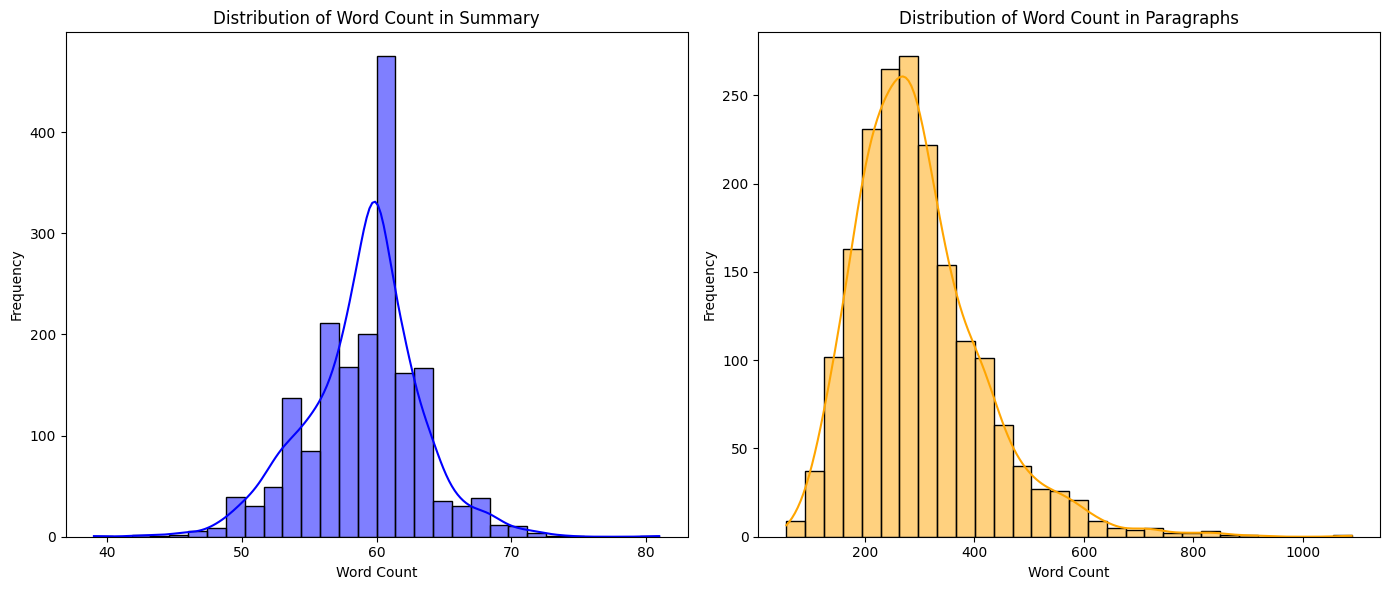

In [ ]:
indosumdist['summary_word_count'] = indosumdist['sum'].str.split().str.len()
indosumdist['paragraphs_word_count'] = indosumdist['text'].str.split().str.len()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(indosumdist['summary_word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count in Summary')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(indosumdist['paragraphs_word_count'], bins=30, kde=True, color='orange')
plt.title('Distribution of Word Count in Paragraphs')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Jumlah kata pada "paragraphs" yang lebih banyak dibandingkan dengan "summary" menunjukkan adanya perubahan jumlah kata yang signifikan dalam proses peringkasan.

# **Sentence Segmentation and Embeddings**

In [ ]:
indosum_new

,text,sum
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...
1,"Jakarta, CNN Indonesia - - Direktur Jenderal O...",Direktur Jenderal Otonomi Daerah Kementerian D...
2,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi...",Mantan Ketua Komisi Pemberantasan Korupsi (KPK...
3,"Jakarta, CNN Indonesia - - Pesawat jet tempur ...",Pesawat jet tempur milik TNI AU melakukan fl...
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...
...,...,...
1872,"Jakarta, CNN Indonesia - - Kepolisian Negara R...",Kepolisian Negara Republik Indonesia mempredik...
1873,JAKARTA (Pos Kota) - Perempuan usia 10 tahun k...,Perempuan usia 10 tahun kini menjadi salah sat...
1874,"Jakarta, CNN Indonesia - - Terbang di kelas ut...",Pemilik blog God Save the Points bernama Glibe...
1875,"Jakarta, CNN Indonesia - - British Academy of ...",British Academy of Film and Television Arts (B...


In [ ]:
indosum_new = indosum_new.reset_index(drop=True)

In [ ]:
indosum_new

,text,sum
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...
1,"Jakarta, CNN Indonesia - - Direktur Jenderal O...",Direktur Jenderal Otonomi Daerah Kementerian D...
2,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi...",Mantan Ketua Komisi Pemberantasan Korupsi (KPK...
3,"Jakarta, CNN Indonesia - - Pesawat jet tempur ...",Pesawat jet tempur milik TNI AU melakukan fl...
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...
...,...,...
1872,"Jakarta, CNN Indonesia - - Kepolisian Negara R...",Kepolisian Negara Republik Indonesia mempredik...
1873,JAKARTA (Pos Kota) - Perempuan usia 10 tahun k...,Perempuan usia 10 tahun kini menjadi salah sat...
1874,"Jakarta, CNN Indonesia - - Terbang di kelas ut...",Pemilik blog God Save the Points bernama Glibe...
1875,"Jakarta, CNN Indonesia - - British Academy of ...",British Academy of Film and Television Arts (B...


In [ ]:
indosum_new['text'].iloc[0]

'Merdeka.com - Timnas Indonesia U - 16 ditumbangkan oleh Thailand di Piala AFF U - 15. Meski demikian, pelatih Timnas U - 16, Fachri Husaini menyebut timnya kalah dengan terhormat. Setelah bermain imbang 2 - 2 melawan Myanmar pada hari Minggu (9/7/2017) lalu, Timnas U - 16 kemudian berhadapan dengan Thailand pada laga kedua grup A, Selasa (11/7/2017). David Maulana dan kawan-kawan takluk dengan skor tipis, 1 - 0. Satu - satunya gol di pertandingan tersebut dicetak oleh Suphanat Muenta pada menit ke - 73. Namun meski kalah, Fachri menyatakan dirinya dan anak-anak asuhnya tidak berkecil hati. Bahkan, Fachri menyatakan tetap optimis menatap laga-laga sisa. Dia yakin timnya akan bisa menyapu bersih semua pertandingan tersebut dan menyabet peluang lolos ke babak selanjutnya. " Kami kalah dengan cara yang terhormat. Kami masih tetap optimis ada tiga pertandingan lagi. Sembilan poin akan kita rebut nanti, " ujar Fachri usai pertandingan. Eks playmaker Timnas Indonesia era tahun 1980 - an ini 

In [ ]:
indosum_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1877 non-null   object
 1   sum     1877 non-null   object
dtypes: object(2)
memory usage: 29.5+ KB


In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 42.1 MB/s eta 0:00:00


In [ ]:
import stanza

In [ ]:
stanza.download("id")

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
nlp = stanza.Pipeline("id")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor    | Package      |
-------------------------------
| tokenize     | gsd          |
| mwt          | gsd          |
| pos          | gsd_charlm   |
| lemma        | gsd_nocharlm |
| constituency | icon_charlm  |
| depparse     | gsd_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could

In [ ]:
! pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
from transformers import T5Tokenizer, T5Model, AutoTokenizer, AutoModelForSeq2SeqLM
import torch

model = SentenceTransformer('google/flan-t5-small')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [ ]:
def text_to_sent_list_flant5(text, nlp, model, min_len=2):
    # Segment text into sentences using stanza
    doc = nlp(text)
    sents = [sentence.text for sentence in doc.sentences]

    # Filter out short sentences based on the minimum length threshold
    sents_clean = [sentence for sentence in sents if len(sentence) > min_len]

    # Remove empty sentences
    sents_clean = [sentence for sentence in sents_clean if len(sentence) != 0]

    # Generate embeddings using FLAN-T5 sentence transformer
    sents_embedding = model.encode(sents_clean, convert_to_numpy=True)

    return sents_clean, sents_embedding

In [ ]:
# def text_to_sent_list_flant5(text, nlp, tokenizer, model, min_len=2):
#     # Segment text into sentences using Stanza
#     doc = nlp(text)
#     sents = [sentence.text for sentence in doc.sentences]

#     # Filter out short sentences based on the minimum length threshold
#     sents_clean = [sentence for sentence in sents if len(sentence) > min_len]

#     # Tokenize each sentence
#     inputs = tokenizer(sents_clean, return_tensors="pt", padding=True, truncation=True)

#     # Move inputs and model to GPU if available
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     inputs = {key: val.to(device) for key, val in inputs.items()}
#     model = model.to(device)

#     # Generate embeddings (use encoder outputs for embeddings)
#     with torch.no_grad():
#         encoder_outputs = model.encoder(**inputs)
#         sents_embedding = encoder_outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Average pooling

#     return sents_clean, sents_embedding

In [ ]:
indosum_new['sents_clean'], indosum_new['sents_embedding'] = zip(
    *indosum_new['text'].apply(lambda x: text_to_sent_list_flant5(x, nlp, model))
)

In [ ]:
# indosum_new['sents_clean'], indosum_new['sents_embedding'] = zip(
#     *indosum_new['text'].apply(lambda x: text_to_sent_list_flant5(x, nlp, tokenizer, model))
# )

In [ ]:
indosum_new['sents_clean'].iloc[0]

['Merdeka.com - Timnas Indonesia U - 16 ditumbangkan oleh Thailand di Piala AFF U - 15.',
 'Meski demikian, pelatih Timnas U - 16, Fachri Husaini menyebut timnya kalah dengan terhormat.',
 'Setelah bermain imbang 2 - 2 melawan Myanmar pada hari Minggu (9/7/2017) lalu, Timnas U - 16 kemudian berhadapan dengan Thailand pada laga kedua grup A, Selasa (11/7/2017).',
 'David Maulana dan kawan-kawan takluk dengan skor tipis, 1 - 0.',
 'Satu - satunya gol di pertandingan tersebut dicetak oleh Suphanat Muenta pada menit ke - 73.',
 'Namun meski kalah, Fachri menyatakan dirinya dan anak-anak asuhnya tidak berkecil hati.',
 'Bahkan, Fachri menyatakan tetap optimis menatap laga-laga sisa.',
 'Dia yakin timnya akan bisa menyapu bersih semua pertandingan tersebut dan menyabet peluang lolos ke babak selanjutnya.',
 '" Kami kalah dengan cara yang terhormat.',
 'Kami masih tetap optimis ada tiga pertandingan lagi.',
 'Sembilan poin akan kita rebut nanti, " ujar Fachri usai pertandingan.',
 'Eks playma

In [ ]:
indosum_new['sents_embedding'].iloc[0]

array([[-0.10664864, -0.07661781,  0.05702126, ...,  0.08410154,
         0.12602438,  0.00609017],
       [-0.07350652, -0.03937337,  0.02766314, ...,  0.07350373,
         0.08751793, -0.03858614],
       [-0.05527048, -0.04018062,  0.03477328, ...,  0.05872485,
         0.09287014, -0.0306402 ],
       ...,
       [-0.07669017, -0.00012953,  0.05516787, ...,  0.01975987,
         0.12012406, -0.05967532],
       [-0.01597362, -0.03108992, -0.0426373 , ...,  0.00815298,
         0.06063044, -0.08666297],
       [-0.03056195, -0.00824077,  0.05315287, ..., -0.01025114,
         0.01983241, -0.07970735]], dtype=float32)

In [ ]:
indosum_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             1877 non-null   object
 1   sum              1877 non-null   object
 2   sents_clean      1877 non-null   object
 3   sents_embedding  1877 non-null   object
dtypes: object(4)
memory usage: 58.8+ KB


In [ ]:
indosum_new['sumsents_clean'], indosum_new['sumsents_embedding'] = zip(
    *indosum_new['sum'].apply(lambda x: text_to_sent_list_flant5(x, nlp, model))
)

In [ ]:
# indosum_new['sumsents_clean'], indosum_new['sumsents_embedding'] = zip(
#     *indosum_new['sum'].apply(lambda x: text_to_sent_list_flant5(x, nlp, tokenizer, model))
# )

In [ ]:
indosum_new['sumsents_clean'].iloc[0]

['Timnas Indonesia U - 16 ditumbangkan oleh Thailand di Piala AFF U - 15.',
 'Meski demikian, pelatih Timnas U - 16, Fachri Husaini menyebut timnya kalah dengan terhormat.',
 'Setelah bermain imbang 2 - 2 melawan Myanmar pada hari Minggu (9/7/2017) lalu, Timnas U - 16 kemudian berhadapan dengan Thailand pada laga kedua grup A, Selasa (11/7/2017).',
 'David Maulana dan kawan-kawan takluk dengan skor tipis, 1 - 0.']

In [ ]:
indosum_new['sumsents_embedding'].iloc[0]

array([[-0.08597162, -0.04933841,  0.05428093, ...,  0.06749244,
         0.1244797 ,  0.014912  ],
       [-0.07350651, -0.03937338,  0.02766316, ...,  0.07350368,
         0.08751797, -0.03858617],
       [-0.05527046, -0.04018059,  0.03477328, ...,  0.05872482,
         0.09287018, -0.0306402 ],
       [-0.04640184, -0.05805688,  0.03186166, ...,  0.01869249,
         0.11012451, -0.05122614]], dtype=float32)

In [ ]:
indosum_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                1877 non-null   object
 1   sum                 1877 non-null   object
 2   sents_clean         1877 non-null   object
 3   sents_embedding     1877 non-null   object
 4   sumsents_clean      1877 non-null   object
 5   sumsents_embedding  1877 non-null   object
dtypes: object(6)
memory usage: 88.1+ KB


In [ ]:
indosum_new

,text,sum,sents_clean,sents_embedding,sumsents_clean,sumsents_embedding
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...,[Merdeka.com - Timnas Indonesia U - 16 ditumba...,"[[-0.10664864, -0.076617815, 0.057021257, -0.0...",[Timnas Indonesia U - 16 ditumbangkan oleh Tha...,"[[-0.08597162, -0.04933841, 0.054280933, -0.06..."
1,"Jakarta, CNN Indonesia - - Direktur Jenderal O...",Direktur Jenderal Otonomi Daerah Kementerian D...,"[Jakarta, CNN Indonesia - - Direktur Jenderal ...","[[-0.034754977, -0.05669145, 0.017474568, -0.0...",[Direktur Jenderal Otonomi Daerah Kementerian ...,"[[-0.047351994, -0.06388501, 0.017008021, -0.0..."
2,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi...",Mantan Ketua Komisi Pemberantasan Korupsi (KPK...,"[Jakarta, CNN Indonesia - - Mantan Ketua Komis...","[[-0.060182147, -0.03206294, 0.02319651, -0.06...",[Mantan Ketua Komisi Pemberantasan Korupsi (KP...,"[[-0.056746323, -0.04120867, 0.024245013, -0.0..."
3,"Jakarta, CNN Indonesia - - Pesawat jet tempur ...",Pesawat jet tempur milik TNI AU melakukan fl...,"[Jakarta, CNN Indonesia - - Pesawat jet tempur...","[[-0.017445803, -0.04209959, 0.045332335, -0.0...",[Pesawat jet tempur milik TNI AU melakukan f...,"[[-0.03608656, -0.057986952, 0.05963186, -0.05..."
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...,"[MALANG, JUARA.net - Persipura merangsek ke ti...","[[-0.081144415, -0.06934562, 0.08328806, -0.06...",[Persipura merangsek ke tiga besar klasemen se...,"[[-0.053646754, -0.059289187, 0.08917802, -0.0..."
...,...,...,...,...,...,...
1872,"Jakarta, CNN Indonesia - - Kepolisian Negara R...",Kepolisian Negara Republik Indonesia mempredik...,"[Jakarta, CNN Indonesia - - Kepolisian Negara ...","[[-0.051668957, -0.048699606, 0.06618004, -0.0...",[Kepolisian Negara Republik Indonesia mempredi...,"[[-0.026606482, -0.038226504, 0.053838972, -0...."
1873,JAKARTA (Pos Kota) - Perempuan usia 10 tahun k...,Perempuan usia 10 tahun kini menjadi salah sat...,[JAKARTA (Pos Kota) - Perempuan usia 10 tahun ...,"[[-0.005875366, -0.05538169, 0.018083775, -0.0...",[Perempuan usia 10 tahun kini menjadi salah sa...,"[[0.002790641, -0.04971308, 0.0030530612, -0.0..."
1874,"Jakarta, CNN Indonesia - - Terbang di kelas ut...",Pemilik blog God Save the Points bernama Glibe...,"[Jakarta, CNN Indonesia - - Terbang di kelas u...","[[0.010459486, -0.028741773, -0.013265863, -0....",[Pemilik blog God Save the Points bernama Glib...,"[[-0.042819466, -0.06897445, 0.009162177, -0.0..."
1875,"Jakarta, CNN Indonesia - - British Academy of ...",British Academy of Film and Television Arts (B...,"[Jakarta, CNN Indonesia - - British Academy of...","[[-0.041747764, -0.043720163, 0.053093333, -0....",[British Academy of Film and Television Arts (...,"[[-0.042486638, -0.0584167, 0.04258293, -0.077..."


In [ ]:
import os
file_path = '/content/drive/MyDrive/indosum_new_stanza_st-flant5.csv'

indosum_new.to_csv(file_path, index=False)

print(f"indosum_new exported to: {file_path}")

indosum_new exported to: /content/drive/MyDrive/indosum_new_stanza_st-flant5.csv


In [ ]:
file_paths = '/content/drive/MyDrive/indosum_new_stanza_st-flant5.pickle'
indosum_new.to_csv(file_paths, index=False)
print(f"indosum_new picklr exported to: {file_paths}")

indosum_new picklr exported to: /content/drive/MyDrive/indosum_new_stanza_st-flant5.pickle


In [ ]:
indosum_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                1877 non-null   object
 1   sum                 1877 non-null   object
 2   sents_clean         1877 non-null   object
 3   sents_embedding     1877 non-null   object
 4   sumsents_clean      1877 non-null   object
 5   sumsents_embedding  1877 non-null   object
dtypes: object(6)
memory usage: 88.1+ KB


In [ ]:
indosum_new

,text,sum,sents_clean,sents_embedding,sumsents_clean,sumsents_embedding
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...,[Merdeka.com - Timnas Indonesia U - 16 ditumba...,"[[-0.10664864, -0.076617815, 0.057021257, -0.0...",[Timnas Indonesia U - 16 ditumbangkan oleh Tha...,"[[-0.08597162, -0.04933841, 0.054280933, -0.06..."
1,"Jakarta, CNN Indonesia - - Direktur Jenderal O...",Direktur Jenderal Otonomi Daerah Kementerian D...,"[Jakarta, CNN Indonesia - - Direktur Jenderal ...","[[-0.034754977, -0.05669145, 0.017474568, -0.0...",[Direktur Jenderal Otonomi Daerah Kementerian ...,"[[-0.047351994, -0.06388501, 0.017008021, -0.0..."
2,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi...",Mantan Ketua Komisi Pemberantasan Korupsi (KPK...,"[Jakarta, CNN Indonesia - - Mantan Ketua Komis...","[[-0.060182147, -0.03206294, 0.02319651, -0.06...",[Mantan Ketua Komisi Pemberantasan Korupsi (KP...,"[[-0.056746323, -0.04120867, 0.024245013, -0.0..."
3,"Jakarta, CNN Indonesia - - Pesawat jet tempur ...",Pesawat jet tempur milik TNI AU melakukan fl...,"[Jakarta, CNN Indonesia - - Pesawat jet tempur...","[[-0.017445803, -0.04209959, 0.045332335, -0.0...",[Pesawat jet tempur milik TNI AU melakukan f...,"[[-0.03608656, -0.057986952, 0.05963186, -0.05..."
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...,"[MALANG, JUARA.net - Persipura merangsek ke ti...","[[-0.081144415, -0.06934562, 0.08328806, -0.06...",[Persipura merangsek ke tiga besar klasemen se...,"[[-0.053646754, -0.059289187, 0.08917802, -0.0..."
...,...,...,...,...,...,...
1872,"Jakarta, CNN Indonesia - - Kepolisian Negara R...",Kepolisian Negara Republik Indonesia mempredik...,"[Jakarta, CNN Indonesia - - Kepolisian Negara ...","[[-0.051668957, -0.048699606, 0.06618004, -0.0...",[Kepolisian Negara Republik Indonesia mempredi...,"[[-0.026606482, -0.038226504, 0.053838972, -0...."
1873,JAKARTA (Pos Kota) - Perempuan usia 10 tahun k...,Perempuan usia 10 tahun kini menjadi salah sat...,[JAKARTA (Pos Kota) - Perempuan usia 10 tahun ...,"[[-0.005875366, -0.05538169, 0.018083775, -0.0...",[Perempuan usia 10 tahun kini menjadi salah sa...,"[[0.002790641, -0.04971308, 0.0030530612, -0.0..."
1874,"Jakarta, CNN Indonesia - - Terbang di kelas ut...",Pemilik blog God Save the Points bernama Glibe...,"[Jakarta, CNN Indonesia - - Terbang di kelas u...","[[0.010459486, -0.028741773, -0.013265863, -0....",[Pemilik blog God Save the Points bernama Glib...,"[[-0.042819466, -0.06897445, 0.009162177, -0.0..."
1875,"Jakarta, CNN Indonesia - - British Academy of ...",British Academy of Film and Television Arts (B...,"[Jakarta, CNN Indonesia - - British Academy of...","[[-0.041747764, -0.043720163, 0.053093333, -0....",[British Academy of Film and Television Arts (...,"[[-0.042486638, -0.0584167, 0.04258293, -0.077..."


#**Clustering KMeans**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
def extractive_summary_kmeans(row, threshold=0.8, num_clusters=3):
    sents_emb = np.array(row['sents_embedding'])
    sumsents_emb = np.array(row['sumsents_embedding'])
    n_samples = sents_emb.shape[0]

    if n_samples < num_clusters:
        num_clusters = n_samples

    if num_clusters > 1:
        kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(sents_emb)
        labels = kmeans.labels_
    else:
        labels = [0] * n_samples

    selected_sents = []
    for cluster_id in range(num_clusters):
        cluster_indices = [i for i in range(len(labels)) if labels[i] == cluster_id]
        cluster_sents_emb = sents_emb[cluster_indices]
        cluster_sents_text = [row['sents_clean'][i] for i in cluster_indices]

        similarity_matrix = cosine_similarity(cluster_sents_emb, sumsents_emb)

        max_similarities = similarity_matrix.max(axis=1)
        for i, sim in enumerate(max_similarities):
            if sim >= threshold:
                selected_sents.append((cluster_sents_text[i], sim))

    selected_sents = sorted(selected_sents, key=lambda x: x[1], reverse=True)

    num_sentences = min(num_clusters, len(selected_sents))
    top_sents = [sentence[0] for sentence in selected_sents[:num_sentences]]

    return " ".join(top_sents)

In [ ]:
indosum_new['extractive_summary'] = indosum_new.apply(lambda row: extractive_summary_kmeans(row, threshold=0.8, num_clusters=3), axis=1)

In [ ]:
indosum_new

,text,sum,sents_clean,sents_embedding,sumsents_clean,sumsents_embedding,extractive_summary
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...,[Merdeka.com - Timnas Indonesia U - 16 ditumba...,"[[-0.10664864, -0.076617815, 0.057021257, -0.0...",[Timnas Indonesia U - 16 ditumbangkan oleh Tha...,"[[-0.08597162, -0.04933841, 0.054280933, -0.06...",David Maulana dan kawan-kawan takluk dengan sk...
1,"Jakarta, CNN Indonesia - - Direktur Jenderal O...",Direktur Jenderal Otonomi Daerah Kementerian D...,"[Jakarta, CNN Indonesia - - Direktur Jenderal ...","[[-0.034754977, -0.05669145, 0.017474568, -0.0...",[Direktur Jenderal Otonomi Daerah Kementerian ...,"[[-0.047351994, -0.06388501, 0.017008021, -0.0...",""" Kalau sudah dievaluasi oleh Mendagri kemungk..."
2,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi...",Mantan Ketua Komisi Pemberantasan Korupsi (KPK...,"[Jakarta, CNN Indonesia - - Mantan Ketua Komis...","[[-0.060182147, -0.03206294, 0.02319651, -0.06...",[Mantan Ketua Komisi Pemberantasan Korupsi (KP...,"[[-0.056746323, -0.04120867, 0.024245013, -0.0...",Antasari mengaku hanya ingin tenang sambil men...
3,"Jakarta, CNN Indonesia - - Pesawat jet tempur ...",Pesawat jet tempur milik TNI AU melakukan fl...,"[Jakarta, CNN Indonesia - - Pesawat jet tempur...","[[-0.017445803, -0.04209959, 0.045332335, -0.0...",[Pesawat jet tempur milik TNI AU melakukan f...,"[[-0.03608656, -0.057986952, 0.05963186, -0.05...",Flying pass ini adalah atraksi terbang bebas y...
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...,"[MALANG, JUARA.net - Persipura merangsek ke ti...","[[-0.081144415, -0.06934562, 0.08328806, -0.06...",[Persipura merangsek ke tiga besar klasemen se...,"[[-0.053646754, -0.059289187, 0.08917802, -0.0...",Kondisi itu terjadi setelah M Tahir dkk sukses...
...,...,...,...,...,...,...,...
1872,"Jakarta, CNN Indonesia - - Kepolisian Negara R...",Kepolisian Negara Republik Indonesia mempredik...,"[Jakarta, CNN Indonesia - - Kepolisian Negara ...","[[-0.051668957, -0.048699606, 0.06618004, -0.0...",[Kepolisian Negara Republik Indonesia mempredi...,"[[-0.026606482, -0.038226504, 0.053838972, -0....","Jakarta, CNN Indonesia - - Kepolisian Negara R..."
1873,JAKARTA (Pos Kota) - Perempuan usia 10 tahun k...,Perempuan usia 10 tahun kini menjadi salah sat...,[JAKARTA (Pos Kota) - Perempuan usia 10 tahun ...,"[[-0.005875366, -0.05538169, 0.018083775, -0.0...",[Perempuan usia 10 tahun kini menjadi salah sa...,"[[0.002790641, -0.04971308, 0.0030530612, -0.0...","Menurut Wendi, menghambat masa transisi anak p..."
1874,"Jakarta, CNN Indonesia - - Terbang di kelas ut...",Pemilik blog God Save the Points bernama Glibe...,"[Jakarta, CNN Indonesia - - Terbang di kelas u...","[[0.010459486, -0.028741773, -0.013265863, -0....",[Pemilik blog God Save the Points bernama Glib...,"[[-0.042819466, -0.06897445, 0.009162177, -0.0...",Ia mengatakan bahwa membeli tiket pesawat deng...
1875,"Jakarta, CNN Indonesia - - British Academy of ...",British Academy of Film and Television Arts (B...,"[Jakarta, CNN Indonesia - - British Academy of...","[[-0.041747764, -0.043720163, 0.053093333, -0....",[British Academy of Film and Television Arts (...,"[[-0.042486638, -0.0584167, 0.04258293, -0.077...",Para kritikus menyoroti nomine BAFTA untuk kat...


## Sample [0]

In [ ]:
sample_idx = 0
sample = indosum_new.iloc[sample_idx]

print("Original Text:", sample['text'])
print("Generated Cluster Summary:", sample['extractive_summary'])
print("Reference Summary:", sample['sum'])

Original Text: Merdeka.com - Timnas Indonesia U - 16 ditumbangkan oleh Thailand di Piala AFF U - 15. Meski demikian, pelatih Timnas U - 16, Fachri Husaini menyebut timnya kalah dengan terhormat. Setelah bermain imbang 2 - 2 melawan Myanmar pada hari Minggu (9/7/2017) lalu, Timnas U - 16 kemudian berhadapan dengan Thailand pada laga kedua grup A, Selasa (11/7/2017). David Maulana dan kawan-kawan takluk dengan skor tipis, 1 - 0. Satu - satunya gol di pertandingan tersebut dicetak oleh Suphanat Muenta pada menit ke - 73. Namun meski kalah, Fachri menyatakan dirinya dan anak-anak asuhnya tidak berkecil hati. Bahkan, Fachri menyatakan tetap optimis menatap laga-laga sisa. Dia yakin timnya akan bisa menyapu bersih semua pertandingan tersebut dan menyabet peluang lolos ke babak selanjutnya. " Kami kalah dengan cara yang terhormat. Kami masih tetap optimis ada tiga pertandingan lagi. Sembilan poin akan kita rebut nanti, " ujar Fachri usai pertandingan. Eks playmaker Timnas Indonesia era tahun 

In [ ]:
pip install rouge

In [ ]:
from rouge import Rouge

In [ ]:
rouge = Rouge()

In [ ]:
rouge_score = rouge.get_scores(sample['extractive_summary'], sample['sum'])[0]

In [ ]:
print("ROUGE-1 Score:", rouge_score['rouge-1']['f'])
print("ROUGE-2 Score:", rouge_score['rouge-2']['f'])
print("ROUGE-L Score:", rouge_score['rouge-l']['f'])

ROUGE-1 Score: 0.9263157845008311
ROUGE-2 Score: 0.8648648599139681
ROUGE-L Score: 0.9263157845008311


In [ ]:
pip install bert-score

In [ ]:
from bert_score import score

P, R, F1 = score([sample['extractive_summary']], [sample['sum']], lang="id", verbose=True)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.24 seconds, 4.21 sentences/sec


In [ ]:
print("BERT Precision:", P.mean().item())
print("BERT Recall:", R.mean().item())
print("BERT F1 Score:", F1.mean().item())

BERT Precision: 0.8872373104095459
BERT Recall: 0.862236499786377
BERT F1 Score: 0.8745582699775696


# **Evaluation**

## ROUGE SCORE

In [ ]:
def calculate_rouge_scores(df):
  rouge_1_scores = []
  rouge_2_scores = []
  rouge_l_scores = []

  for index, row in df.iterrows():
    try:
      scores = rouge.get_scores(row['extractive_summary'], row['sum'])[0]
      rouge_1_scores.append(scores['rouge-1']['f'])
      rouge_2_scores.append(scores['rouge-2']['f'])
      rouge_l_scores.append(scores['rouge-l']['f'])
    except:
      rouge_1_scores.append(0)
      rouge_2_scores.append(0)
      rouge_l_scores.append(0)

  df['rouge_1'] = rouge_1_scores
  df['rouge_2'] = rouge_2_scores
  df['rouge_l'] = rouge_l_scores
  return df

In [ ]:
indosum_new = calculate_rouge_scores(indosum_new)

In [ ]:
print("Average ROUGE-1 Score:", indosum_new['rouge_1'].mean())
print("Average ROUGE-2 Score:", indosum_new['rouge_2'].mean())
print("Average ROUGE-L Score:", indosum_new['rouge_l'].mean())

Average ROUGE-1 Score: 0.7835026975262289
Average ROUGE-2 Score: 0.7063875670292785
Average ROUGE-L Score: 0.7798276428014352


## **BERT SCORE**

In [ ]:
def calculate_bert_score(df):
  P_scores = []
  R_scores = []
  F1_scores = []

  for index, row in df.iterrows():
    try:
      P, R, F1 = score([row['extractive_summary']], [row['sum']], lang="id", verbose=False)
      P_scores.append(P.mean().item())
      R_scores.append(R.mean().item())
      F1_scores.append(F1.mean().item())
    except:
      P_scores.append(0)
      R_scores.append(0)
      F1_scores.append(0)

  df['bert_precision'] = P_scores
  df['bert_recall'] = R_scores
  df['bert_f1'] = F1_scores
  return df

In [ ]:
indosum_new = calculate_bert_score(indosum_new)

In [ ]:
print("Average BERT Precision:", indosum_new['bert_precision'].mean())
print("Average BERT Recall:", indosum_new['bert_recall'].mean())
print("Average BERT F1 Score:", indosum_new['bert_f1'].mean())

Average BERT Precision: 0.8617008206180009
Average BERT Recall: 0.8745388874489384
Average BERT F1 Score: 0.8671101955384349


# **Indosum_new with scores**

In [ ]:
indosum_new

,text,sum,sents_clean,sents_embedding,sumsents_clean,sumsents_embedding,extractive_summary,rouge_1,rouge_2,rouge_l,bert_precision,bert_recall,bert_f1
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...,[Merdeka.com - Timnas Indonesia U - 16 ditumba...,"[[-0.10664864, -0.076617815, 0.057021257, -0.0...",[Timnas Indonesia U - 16 ditumbangkan oleh Tha...,"[[-0.08597162, -0.04933841, 0.054280933, -0.06...",David Maulana dan kawan-kawan takluk dengan sk...,0.926316,0.864865,0.926316,0.887237,0.862236,0.874558
1,"Jakarta, CNN Indonesia - - Direktur Jenderal O...",Direktur Jenderal Otonomi Daerah Kementerian D...,"[Jakarta, CNN Indonesia - - Direktur Jenderal ...","[[-0.034754977, -0.05669145, 0.017474568, -0.0...",[Direktur Jenderal Otonomi Daerah Kementerian ...,"[[-0.047351994, -0.06388501, 0.017008021, -0.0...",""" Kalau sudah dievaluasi oleh Mendagri kemungk...",0.800000,0.741259,0.800000,0.849887,0.918882,0.883039
2,"Jakarta, CNN Indonesia - - Mantan Ketua Komisi...",Mantan Ketua Komisi Pemberantasan Korupsi (KPK...,"[Jakarta, CNN Indonesia - - Mantan Ketua Komis...","[[-0.060182147, -0.03206294, 0.02319651, -0.06...",[Mantan Ketua Komisi Pemberantasan Korupsi (KP...,"[[-0.056746323, -0.04120867, 0.024245013, -0.0...",Antasari mengaku hanya ingin tenang sambil men...,0.803922,0.703704,0.803922,0.867805,0.842890,0.855166
3,"Jakarta, CNN Indonesia - - Pesawat jet tempur ...",Pesawat jet tempur milik TNI AU melakukan fl...,"[Jakarta, CNN Indonesia - - Pesawat jet tempur...","[[-0.017445803, -0.04209959, 0.045332335, -0.0...",[Pesawat jet tempur milik TNI AU melakukan f...,"[[-0.03608656, -0.057986952, 0.05963186, -0.05...",Flying pass ini adalah atraksi terbang bebas y...,0.767677,0.655172,0.767677,0.858728,0.831815,0.845057
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...,"[MALANG, JUARA.net - Persipura merangsek ke ti...","[[-0.081144415, -0.06934562, 0.08328806, -0.06...",[Persipura merangsek ke tiga besar klasemen se...,"[[-0.053646754, -0.059289187, 0.08917802, -0.0...",Kondisi itu terjadi setelah M Tahir dkk sukses...,0.971429,0.947368,0.971429,0.898401,0.936598,0.917102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,"Jakarta, CNN Indonesia - - Kepolisian Negara R...",Kepolisian Negara Republik Indonesia mempredik...,"[Jakarta, CNN Indonesia - - Kepolisian Negara ...","[[-0.051668957, -0.048699606, 0.06618004, -0.0...",[Kepolisian Negara Republik Indonesia mempredi...,"[[-0.026606482, -0.038226504, 0.053838972, -0....","Jakarta, CNN Indonesia - - Kepolisian Negara R...",0.503496,0.418605,0.503496,0.741663,0.879489,0.804717
1873,JAKARTA (Pos Kota) - Perempuan usia 10 tahun k...,Perempuan usia 10 tahun kini menjadi salah sat...,[JAKARTA (Pos Kota) - Perempuan usia 10 tahun ...,"[[-0.005875366, -0.05538169, 0.018083775, -0.0...",[Perempuan usia 10 tahun kini menjadi salah sa...,"[[0.002790641, -0.04971308, 0.0030530612, -0.0...","Menurut Wendi, menghambat masa transisi anak p...",0.348485,0.166667,0.333333,0.736603,0.744609,0.740584
1874,"Jakarta, CNN Indonesia - - Terbang di kelas ut...",Pemilik blog God Save the Points bernama Glibe...,"[Jakarta, CNN Indonesia - - Terbang di kelas u...","[[0.010459486, -0.028741773, -0.013265863, -0....",[Pemilik blog God Save the Points bernama Glib...,"[[-0.042819466, -0.06897445, 0.009162177, -0.0...",Ia mengatakan bahwa membeli tiket pesawat deng...,0.737864,0.714286,0.737864,0.867668,0.886925,0.877191
1875,"Jakarta, CNN Indonesia - - British Academy of ...",British Academy of Film and Television Arts (B...,"[Jakarta, CNN Indonesia - - British Academy of...","[[-0.041747764, -0.043720163, 0.053093333, -0....",[British Academy of Film and Television Arts (...,"[[-0.042486638, -0.0584167, 0.04258293, -0.077...",Para kritikus menyoroti nomine BAFTA untuk kat...,0.794872,0.771084,0.794872,0.938140,0.864205,0.899656


In [ ]:
print(indosum_new.tail(int(len(indosum_new)*0.1)))

                                                   text  \
1690  Jakarta, CNN Indonesia - - Ketua Umum Partai K...   
1691  Jakarta, CNN Indonesia - - Panglima TNI Jender...   
1692  Jakarta, CNN Indonesia - - Menteri Kesehatan J...   
1693  JUARA.net   - Legenda Formula 1 (F1) asal Finl...   
1694  SPANYOL– Peran Gareth Bale dalam seragam Real ...   
...                                                 ...   
1872  Jakarta, CNN Indonesia - - Kepolisian Negara R...   
1873  JAKARTA (Pos Kota) - Perempuan usia 10 tahun k...   
1874  Jakarta, CNN Indonesia - - Terbang di kelas ut...   
1875  Jakarta, CNN Indonesia - - British Academy of ...   
1876  JUARA.NET, BUDAPEST - Perenang putra Amerika S...   

                                                    sum  \
1690  Ketua Umum PKB Muhamin Iskandar menyatakan Pan...   
1691  Panglima TNI Jenderal Gatot Nurmantyo mengaku ...   
1692  Menteri Kesehatan Jepang mengungkapkan bahwa s...   
1693  Legenda Formula 1 (F1) asal Finlandia, Mika Sa...

In [ ]:
rows_meeting_criteria = indosum_new[(indosum_new['bert_f1'] >= 0.85) & (indosum_new['bert_recall'] >= 0.85) & (indosum_new['bert_precision'] >= 0.85)]
rows_meeting_criteria

,text,sum,sents_clean,sents_embedding,sumsents_clean,sumsents_embedding,extractive_summary,rouge_1,rouge_2,rouge_l,bert_precision,bert_recall,bert_f1
0,Merdeka.com - Timnas Indonesia U - 16 ditumban...,Timnas Indonesia U - 16 ditumbangkan oleh Thai...,[Merdeka.com - Timnas Indonesia U - 16 ditumba...,"[[-0.10664864, -0.076617815, 0.057021257, -0.0...",[Timnas Indonesia U - 16 ditumbangkan oleh Tha...,"[[-0.08597162, -0.04933841, 0.054280933, -0.06...",David Maulana dan kawan-kawan takluk dengan sk...,0.926316,0.864865,0.926316,0.887237,0.862236,0.874558
4,"MALANG, JUARA.net - Persipura merangsek ke tig...",Persipura merangsek ke tiga besar klasemen sem...,"[MALANG, JUARA.net - Persipura merangsek ke ti...","[[-0.081144415, -0.06934562, 0.08328806, -0.06...",[Persipura merangsek ke tiga besar klasemen se...,"[[-0.053646754, -0.059289187, 0.08917802, -0.0...",Kondisi itu terjadi setelah M Tahir dkk sukses...,0.971429,0.947368,0.971429,0.898401,0.936598,0.917102
5,Kebakaran melanda sebuah peternakan ayam di Ja...,Kebakaran melanda sebuah peternakan ayam di Ja...,[Kebakaran melanda sebuah peternakan ayam di J...,"[[-0.0066178027, -0.029049668, 0.03164536, -0....",[Kebakaran melanda sebuah peternakan ayam di J...,"[[-0.006617781, -0.029049672, 0.031645358, -0....",Kebakaran melanda sebuah peternakan ayam di Ja...,0.883333,0.839695,0.883333,0.924462,0.977789,0.950378
6,Aplikasi pemindai dokumen Adobe Scan yang dilu...,Aplikasi pemindai dokumen Adobe Scan yang dilu...,[Aplikasi pemindai dokumen Adobe Scan yang dil...,"[[0.0009642759, -0.05467166, 0.00882909, -0.09...",[Aplikasi pemindai dokumen Adobe Scan yang dil...,"[[0.0009642606, -0.054671656, 0.008829092, -0....",Aplikasi pemindai dokumen Adobe Scan yang dilu...,0.988764,0.955752,0.988764,0.986839,0.993626,0.990220
7,"Jakarta, CNN Indonesia - - Persib Bandung tera...",Persib Bandung terancam sanksi berat usai keri...,"[Jakarta, CNN Indonesia - - Persib Bandung ter...","[[-0.015760154, -0.045448583, 0.03860656, -0.0...",[Persib Bandung terancam sanksi berat usai ker...,"[[-0.023750624, -0.062384073, 0.04334283, -0.0...",Duel panas ini diwarnai pertikaian antarpemain...,0.972973,0.929134,0.972973,0.900691,0.915265,0.907920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,"Jakarta, CNN Indonesia - - Juventus untuk seme...",Juventus untuk sementara berhak atas puncak kl...,"[Jakarta, CNN Indonesia - - Juventus untuk sem...","[[-0.046611317, -0.043445725, 0.04682352, -0.0...",[Juventus untuk sementara berhak atas puncak k...,"[[-0.05769593, -0.05240494, 0.053048458, -0.07...",Tambahan tiga angka dari laga lawan Sassuolo i...,0.936170,0.892857,0.936170,0.901633,0.933704,0.917388
1869,"Jakarta, CNN Indonesia - - Pemerintah menggala...",Pemerintah menggalakkan lagi program Keluarga ...,"[Jakarta, CNN Indonesia - - Pemerintah menggal...","[[-0.026510973, -0.0058474373, 0.03565966, -0....",[Pemerintah menggalakkan lagi program Keluarga...,"[[-0.027708283, -0.0343547, 0.0455169, -0.0909...","Dengan harapan, tidak hanya menurunkan angka k...",0.813953,0.778947,0.813953,0.952055,0.862106,0.904851
1874,"Jakarta, CNN Indonesia - - Terbang di kelas ut...",Pemilik blog God Save the Points bernama Glibe...,"[Jakarta, CNN Indonesia - - Terbang di kelas u...","[[0.010459486, -0.028741773, -0.013265863, -0....",[Pemilik blog God Save the Points bernama Glib...,"[[-0.042819466, -0.06897445, 0.009162177, -0.0...",Ia mengatakan bahwa membeli tiket pesawat deng...,0.737864,0.714286,0.737864,0.867668,0.886925,0.877191
1875,"Jakarta, CNN Indonesia - - British Academy of ...",British Academy of Film and Television Arts (B...,"[Jakarta, CNN Indonesia - - British Academy of...","[[-0.041747764, -0.043720163, 0.053093333, -0....",[British Academy of Film and Television Arts (...,"[[-0.042486638, -0.0584167, 0.04258293, -0.077...",Para kritikus menyoroti nomine BAFTA untuk kat...,0.794872,0.771084,0.794872,0.938140,0.864205,0.899656


In [ ]:
indosum_new.iloc[1600]

,1600
text,Kasus perseteruan yang melibatkan Nikita Mirza...
sum,Kasus perseteruan yang melibatkan Nikita Mirza...
sents_clean,[Kasus perseteruan yang melibatkan Nikita Mirz...
sents_embedding,"[[-0.04161074, -0.045019336, 0.02601862, -0.04..."
sumsents_clean,[Kasus perseteruan yang melibatkan Nikita Mirz...
sumsents_embedding,"[[-0.041610733, -0.04501933, 0.02601863, -0.04..."
extractive_summary,Kasus perseteruan yang melibatkan Nikita Mirza...
rouge_1,0.793388
rouge_2,0.680851
rouge_l,0.776859


In [ ]:
print(indosum_new['extractive_summary'].iloc[1600])

Kasus perseteruan yang melibatkan Nikita Mirzani dan asisten Julia Perez, Lucky, masih berbuntut panjang. Sebelumnya pihak Niki diketahui sempat mencabut laporannya di Polres Metro Jakarta Selatan, namun setelah status Niki ditetapkan sebagai tersangka atas kasus kekerasan terhadap Lucky yang diduga dilakukan Niki dan temannya, akhirnya ibu dua anak itu pun melakukan pembatalan pencabutan laporan. Tak hanya dua pihak yang berseteru, tapi kasus ini juga harus melibatkan pedangdut Julia Perez, karena Niki tidak terima dengan segala tudingan yang dilontarkan Jupe --panggilan akrab Julia Perez - - di media sosial.


In [ ]:
print("Generated Sum:", indosum_new['extractive_summary'].iloc[1600])
print("Reference Sum:", indosum_new['sum'].iloc[1600])

Generated Sum: Kasus perseteruan yang melibatkan Nikita Mirzani dan asisten Julia Perez, Lucky, masih berbuntut panjang. Sebelumnya pihak Niki diketahui sempat mencabut laporannya di Polres Metro Jakarta Selatan, namun setelah status Niki ditetapkan sebagai tersangka atas kasus kekerasan terhadap Lucky yang diduga dilakukan Niki dan temannya, akhirnya ibu dua anak itu pun melakukan pembatalan pencabutan laporan. Tak hanya dua pihak yang berseteru, tapi kasus ini juga harus melibatkan pedangdut Julia Perez, karena Niki tidak terima dengan segala tudingan yang dilontarkan Jupe --panggilan akrab Julia Perez - - di media sosial.
Reference Sum: Kasus perseteruan yang melibatkan Nikita Mirzani dan asisten Julia Perez, Lucky, masih berbuntut panjang. Kasus ini juga harus melibatkan pedangdut Julia Perez, karena Niki tidak terima dengan segala tudingan yang dilontarkan Jupe. Sebelumnya pihak Niki diketahui sempat mencabut laporannya di Polres Metro Jakarta Selatan, namun setelah status Niki di

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec  4 08:32:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              35W /  70W |   2675MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--